# 데이터 전처리 및 시각화
- Pandas, Matplotlib 활용
- Pandas
  - 2008년 출시, Wes McKineey 개발
  - 목적 : 데이터 분석 및 조작을 위한 고성능 처리(Pandas Core가 c언어로 처리되어 있다), 데이터 구조를 지원하는 라이브러리
  - 특징 : 데이터 프레임(DataFrame) 및 시리즈(Series)를 바탕으로 데이터 처리
    1. 데이터 처리 빠르고 효율적
    2. 지원하는 생태계가 넓어 다른 라이브러리와 연결/통합 가능
    3. 인덱싱 지원, 효율적인 처리 가능
    4. 벡터화된 연산 지원
    5. Numpy를 기반, Numpy 연산 대부분 호환
  - Series는 한 Column과 데이터를 함께 묶은 개념

### EDA
- EDA?
  - EDA(Exploratory Data Analysis), 탐색적 데이터 분석
- Colab에서는 Pandas 관련 간단한 EDA가 존재


In [2]:
%pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 27.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd

data = {
    "Name": ["Alice", "Bob", "Charlie"],
    "Age": [25, 30, 35],
    "City": ["New York", "Paris", "London"],
}

df = pd.DataFrame(data)
df.to_csv("sample_data.csv", index=False)

df = pd.read_csv("sample_data.csv")
df

,Name,Age,City
0,Alice,25,New York
1,Bob,30,Paris
2,Charlie,35,London


In [16]:
print("Original DataFrame:")
print(df)

print("\nAge Column: ")
print(df["Age"])


filtered_df = df[df["Age"] > 28]
print("\nFiltered DataFrame (Age > 28):")
print(filtered_df)

df["Salary"] = [70000, 80000, 90000]
print("\nDataFrame with Salary column:")
print(df)

Original DataFrame:
      Name  Age      City  Salary
0    Alice   25  New York   70000
1      Bob   30     Paris   80000
2  Charlie   35    London   90000

Age Column: 
0    25
1    30
2    35
Name: Age, dtype: int64

Filtered DataFrame (Age > 28):
      Name  Age    City  Salary
1      Bob   30   Paris   80000
2  Charlie   35  London   90000

DataFrame with Salary column:
      Name  Age      City  Salary
0    Alice   25  New York   70000
1      Bob   30     Paris   80000
2  Charlie   35    London   90000


In [18]:
type(df["Age"][0])

numpy.int64

# 데이터 변환 및 집계
- [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
  - Pandas 관련 내용 간단 정리

In [19]:
import pandas as pd
import numpy as np

np.random.seed(0)
data = {
    "Name": np.random.choice(["Alice", "Bob", "Charlie", "David", "Eve", None], size=1000),
    "Age": np.random.randint(20, 60, size=1000),
    "City":np.random.choice(["Seoul", "New York", "Paris", "London", "Berlin", "Tokyo"], size=1000),
    "Salary": np.random.randint(50000, 120000, size=1000),
}

departments = ["HR", "Marketing", "Sales", "IT", "Finance"]
np.random.seed(0)
df2 = pd.DataFrame({
    "Name": df["Name"].dropna().unique(), # unique: 중복 제거
    "Department": np.random.choice(departments, size=len(df["Name"].dropna().unique()))
})

In [23]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# 저장/불러오기
df = pd.DataFrame(data)
df.to_csv("sample_data.csv", index=False)
df2.to_csv("sample_data2.csv", index=False)
df.to_excel("sample_data.xlsx", index=False) # 3만개 정도 넘어가면 저장 못할 수 있다 (Microsoft excel의 한계)
df.to_json("sample_data.json", index=False) # 정보 처리 중간에 오류 발생하면 처리 불가
df.to_json("sample_data_multilines.json", orient="records", index=False, lines=True) # 오류 발생 개선

df = pd.read_excel("sample_data.xlsx")
print(df)
df = pd.read_csv("sample_data.csv")
print(df)
df = pd.read_json("sample_data.json")
print(df)

      Name  Age      City  Salary
0      Eve   35     Seoul   50889
1      NaN   40    Berlin  110224
2    Alice   29     Tokyo   80141
3    David   24     Paris   59740
4    David   44     Paris   62998
..     ...  ...       ...     ...
995    Eve   24  New York   77062
996    NaN   30     Tokyo   76061
997    NaN   26     Tokyo   55645
998  David   28     Seoul  110482
999  Alice   28    Berlin   61768

[1000 rows x 4 columns]
      Name  Age      City  Salary
0      Eve   35     Seoul   50889
1      NaN   40    Berlin  110224
2    Alice   29     Tokyo   80141
3    David   24     Paris   59740
4    David   44     Paris   62998
..     ...  ...       ...     ...
995    Eve   24  New York   77062
996    NaN   30     Tokyo   76061
997    NaN   26     Tokyo   55645
998  David   28     Seoul  110482
999  Alice   28    Berlin   61768

[1000 rows x 4 columns]
      Name  Age      City  Salary
0      Eve   35     Seoul   50889
1     None   40    Berlin  110224
2    Alice   29     Tokyo   8014

In [40]:
# 데이터 정제
df = pd.read_csv("sample_data.csv")

older_than30 = df[df["Age"] >= 30]
print(older_than30)

older_in_seoul = df[(df["Age"] >= 30) & (df["City"] == "Seoul")]
print(older_in_seoul.head()) # 5개만 출력

df_not_null = df[df["Name"].notna()]
df_is_null = df[df["Name"].isna()]

# 이름에 'a' 포함
df_with_a = df[df["Name"].str.contains("a", na=False)]
print(df_with_a.head()) # 5개만 출력


        Name  Age      City  Salary
0        Eve   35     Seoul   50889
1        NaN   40    Berlin  110224
4      David   44     Paris   62998
5      David   50     Tokyo  104176
7      David   39  New York  117249
..       ...  ...       ...     ...
989  Charlie   37  New York  116816
990      NaN   42    London   81501
991      Eve   33  New York   75625
993      NaN   31     Tokyo   60565
996      NaN   30     Tokyo   76061

[769 rows x 4 columns]
   Name  Age   City  Salary
0   Eve   35  Seoul   50889
17  Bob   41  Seoul  119063
18  NaN   40  Seoul   67344
20  NaN   57  Seoul   85779
32  Bob   45  Seoul  108539
      Name  Age      City  Salary
3    David   24     Paris   59740
4    David   44     Paris   62998
5    David   50     Tokyo  104176
7    David   39  New York  117249
9  Charlie   33    Berlin   50075


In [32]:
df["Age"] >= 30

0       True
1       True
2      False
3      False
4       True
       ...  
995    False
996     True
997    False
998    False
999    False
Name: Age, Length: 1000, dtype: bool

In [42]:
# 데이터 변환

# 예) 대분자 변환
df["Name"] = df["Name"].apply(lambda x: x.upper() if pd.notna(x) else x)
print(df)

# 예) 이름과 City를 결합한 새로운 컬럼 생성
def process(row: pd.Series) -> str:
    if pd.notna(row['Name']):
        return f"{row['Name']} from {row['Name']}"
    return f"Unknown from {row['City']}"
df["Name_City"] = df.apply(process, axis=1)
print(df)

      Name  Age      City  Salary
0      EVE   35     Seoul   50889
1      NaN   40    Berlin  110224
2    ALICE   29     Tokyo   80141
3    DAVID   24     Paris   59740
4    DAVID   44     Paris   62998
..     ...  ...       ...     ...
995    EVE   24  New York   77062
996    NaN   30     Tokyo   76061
997    NaN   26     Tokyo   55645
998  DAVID   28     Seoul  110482
999  ALICE   28    Berlin   61768

[1000 rows x 4 columns]
      Name  Age      City  Salary            Name_City
0      EVE   35     Seoul   50889         EVE from EVE
1      NaN   40    Berlin  110224  Unknown from Berlin
2    ALICE   29     Tokyo   80141     ALICE from ALICE
3    DAVID   24     Paris   59740     DAVID from DAVID
4    DAVID   44     Paris   62998     DAVID from DAVID
..     ...  ...       ...     ...                  ...
995    EVE   24  New York   77062         EVE from EVE
996    NaN   30     Tokyo   76061   Unknown from Tokyo
997    NaN   26     Tokyo   55645   Unknown from Tokyo
998  DAVID   28  

In [ ]:
# 데이터 집계/조인
average_salary = df["Salary"].mean()
print(average_salary)

average_age_by_city = df.groupby("City")["Age"].mean()
print(average_age_by_city)

aggregated_data = df.agg({"Age": ["mean", "min", "max"], "Salary": ["mean", "min", "max"]})
print(aggregated_data)

df = pd.read_csv("sample_data.csv")
df2 = pd.read_csv("sample_data2.csv")
# Inner Join (일치된 것들만 병합)
inner_joined = pd.merge(df, df2, on="Name", how="inner")
print(inner_joined)

# Outer Join
outer_joined = pd.merge(df, df2, on="Name", how="outer") # 예시에서는 Name=NaN인 경우에 Department = NaN

84173.79
City
Berlin      40.493976
London      39.914439
New York    39.987261
Paris       38.596491
Seoul       40.320261
Tokyo       38.686747
Name: Age, dtype: float64
         Age     Salary
mean  39.655   84173.79
min   20.000   50010.00
max   59.000  119939.00
      Name  Age      City  Salary Department
0      Eve   35     Seoul   50889    Finance
1    Alice   29     Tokyo   80141         HR
2    David   24     Paris   59740         IT
3    David   44     Paris   62998         IT
4    David   50     Tokyo  104176         IT
..     ...  ...       ...     ...        ...
824    Bob   22     Paris   59307         IT
825  David   29     Tokyo   82691         IT
826    Eve   24  New York   77062    Finance
827  David   28     Seoul  110482         IT
828  Alice   28    Berlin   61768         HR

[829 rows x 5 columns]


# Dask, 대용량 데이터 처리
- Dask
  - 2014년 출시, Matthew Rocklin 개발
  - 목적: 대규모 계산을 위한 병렬 처리, 지연 실행 및 대규모 데이터셋 처리
  - 특징
    - 동적 작업 스케쥴링
    - 대규모 배열
    - 데이터 프레임
    - 리스트 처리
    - 머신 러닝
    - 병렬 처리 지원
    - Pandas 호환 API
  - 구조
    - 자료구조
      - Dask Array
      - Dask DataFrame
      - Dask Bag
      - Dask Delayed
      - Futures
    - 작업 그래프
    - 스케줄러
      - 단일 머신 (thread, process, 동기화)
      - 분산 처리

In [1]:
%conda install pandas
%conda install dask

Retrieving notices: done
Channels:
 - defaults
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB
    bottleneck-1.4.2           |  py311hf4808d0_0         145 KB
    ca-certificates-2024.12.31 |       h06a4308_0         128 KB
    intel-openmp-2023.1.0      |   hdb19cb5_46306        17.2 MB
    mkl-2023.1.0               |   h213fc3f_46344       171.5 MB
    mkl-service-2.4.0          |  py311h5eee18b_2          69 KB
    numexpr-2.10.1             |  py311h3c60e43_0         200 KB
    pandas-2.2.3               |  py311h6a678d5_0        15.7 MB
    python-tzdata-2023.3       |     pyhd3eb1b0_0         140 KB
    pytz-2024.1                |  py311h06a4308_0         220 KB
    tbb-2021.8.0 

In [9]:
%pip uninstall -y pyarrow

Found existing installation: pyarrow 10.0.1
Uninstalling pyarrow-10.0.1:
  Successfully uninstalled pyarrow-10.0.1
Note: you may need to restart the kernel to use updated packages.


In [15]:
%pip install pybind11
%pip install --no-cache-dir pyarrow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
apt-get install -y libgd-dev
apt-get install -y fontconfig
apt-get install -y libcairo2-dev
apt-get install -y libpango1.0-dev
apt-get install -y libgts-dev

UsageError: Line magic function `%apt-get` not found.


In [1]:
import time
import pandas as pd
import numpy as np
import dask.dataframe as dd

def create_dataset(nrows: int, ncols: int) -> tuple[pd.DataFrame, pd.DataFrame]:
    main_data = {f"col_{i}": np.random.rand(nrows) for i in range(ncols)}
    ref_data = {f"col_{i}": np.random.rand(nrows // 10) for i in range(ncols)}
    main_df = pd.DataFrame(main_data)
    ref_df = pd.DataFrame(ref_data)
    return main_df, ref_df

def pandas_operations(main_df: pd.DataFrame, ref_df: pd.DataFrame) -> tuple[float, float]:
    start_time_agg = time.time()
    grouped = main_df.groupby("col_0").mean()
    end_time_agg = time.time()

    start_time_join = time.time()
    joined = main_df.merge(ref_df, on="col_0", how="left")
    end_time_join = time.time()

    return end_time_agg - start_time_agg, end_time_join - start_time_join

def dask_operations(main_df: pd.DataFrame, ref_df: pd.DataFrame, npartitions: int) -> tuple[float, float]:
    dmain_df = dd.from_pandas(main_df, npartitions=npartitions)
    dref_df = dd.from_pandas(ref_df, npartitions=npartitions)

    start_time_agg = time.time()
    grouped_task = dmain_df.groupby("col_0").mean()
    grouped = grouped_task.compute()
    end_time_agg = time.time()
    grouped_task.visualize("grouped.svg")

    start_time_join = time.time()
    joined_task = dmain_df.merge(dref_df, on="col_0", how="left")
    joined = joined_task.compute()
    end_time_join = time.time()
    joined_task.visualize("joined.svg")

    return end_time_agg - start_time_agg, end_time_join - start_time_join

main_df, ref_df = create_dataset(10_000_000, 5)
pandas_agg_time, pandas_join_time = pandas_operations(main_df, ref_df)
dask_agg_time, dask_join_time = dask_operations(main_df, ref_df, npartitions=10)

print("Pandas 집계 시간: ", pandas_agg_time, "초")
print("Pandas 조인 시간: ", pandas_join_time, "초")
print("Dask 집계 시간: ", dask_agg_time, "초")
print("Dask 조인 시간: ", dask_join_time, "초")

Format: "png" not recognized. Use one of: canon cmap cmapx cmapx_np dot dot_json eps fig gv imap imap_np ismap json json0 mp pic plain plain-ext pov ps ps2 svg svgz tk vdx vml vmlz xdot xdot1.2 xdot1.4 xdot_json


CalledProcessError: Command '[PosixPath('dot'), '-Kdot', '-Tpng']' returned non-zero exit status 1. [stderr: b'Format: "png" not recognized. Use one of: canon cmap cmapx cmapx_np dot dot_json eps fig gv imap imap_np ismap json json0 mp pic plain plain-ext pov ps ps2 svg svgz tk vdx vml vmlz xdot xdot1.2 xdot1.4 xdot_json\n']

# Matplotlib 시각화
- 2008년 출시
- 개발자 John D. Hunter
- 목적 : 데이터 시각화 및 그래픽 라이브러리
- 특징 : 2D를 포함한 다양한 그래프, 그래프의 랜더링 및 이미지 변환 지원

In [2]:
%conda install seaborn

Retrieving notices: done
Channels:
 - defaults
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    matplotlib-base-3.10.0     |  py311hbfdbfaf_0         8.3 MB
    seaborn-0.13.2             |  py311h06a4308_1         730 KB
    ------------------------------------------------------------
                                           Total:         9.0 MB

The following NEW packages will be INSTALLED:

  matplotlib-base    pkgs/main/linux-64::matplotlib-base-3.10.0-py311hbfdbfaf_0 
  seaborn            pkgs/main/linux-64::seaborn-0.13.2-py311h06a4308_1 



matplotlib-base-3.10 | 8.3 MB    |                                       |   0% 
matplotlib-base-3.10 | 8.3 MB    | ###                                   |   8% 
seaborn-0.13.2       | 730 KB    | ####

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

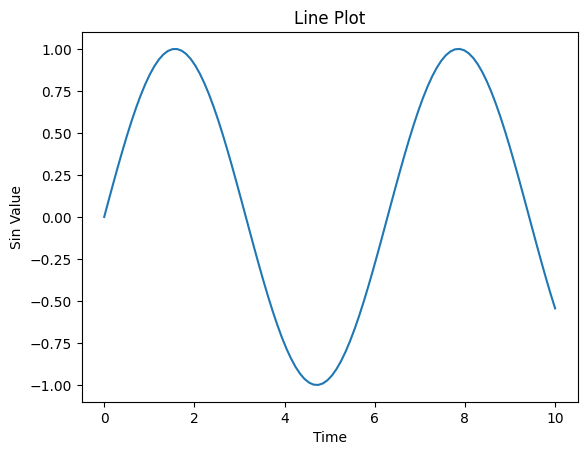

In [5]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
plt.title("Line Plot")
plt.xlabel("Time")
plt.ylabel("Sin Value")
plt.show()

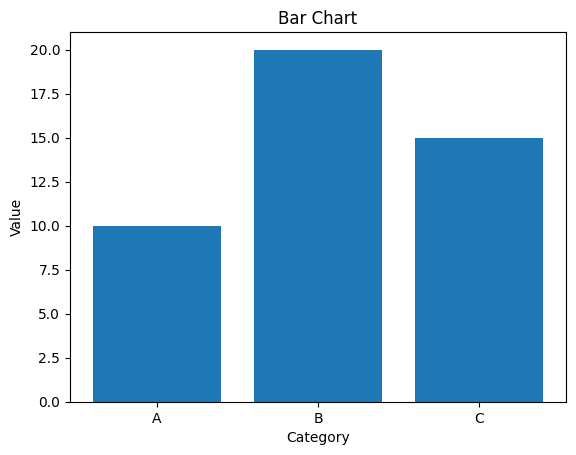

In [6]:
categories = ["A", "B", "C"]
values = [10, 20, 15]

plt.bar(categories, values)
plt.title("Bar Chart")
plt.xlabel("Category")
plt.ylabel("Value")
plt.show()

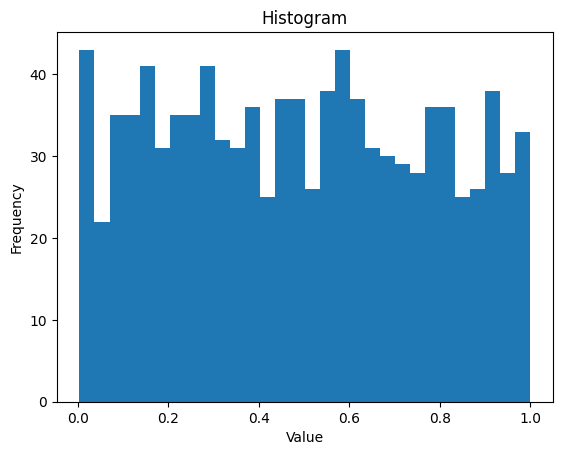

In [11]:
data = np.random.rand(1000)

plt.hist(data, bins=30)
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

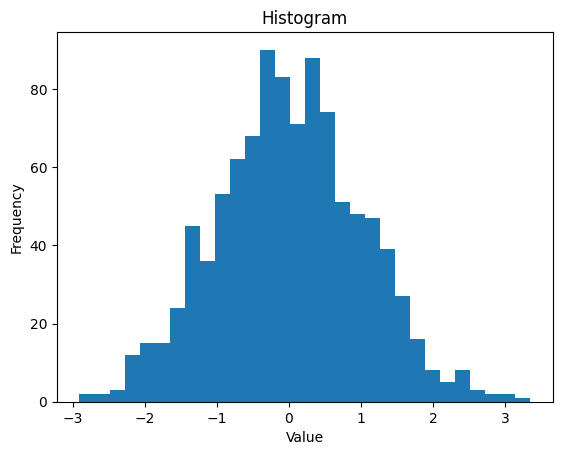

In [10]:
data = np.random.randn(1000)

plt.hist(data, bins=30)
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

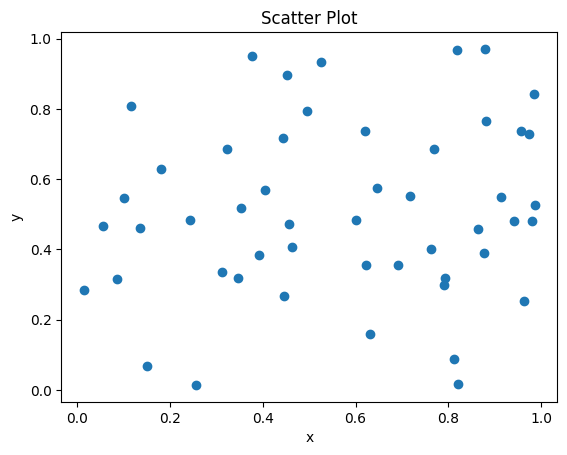

In [9]:
x = np.random.rand(50)
y = np.random.rand(50)

plt.scatter(x, y)
plt.title("Scatter Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

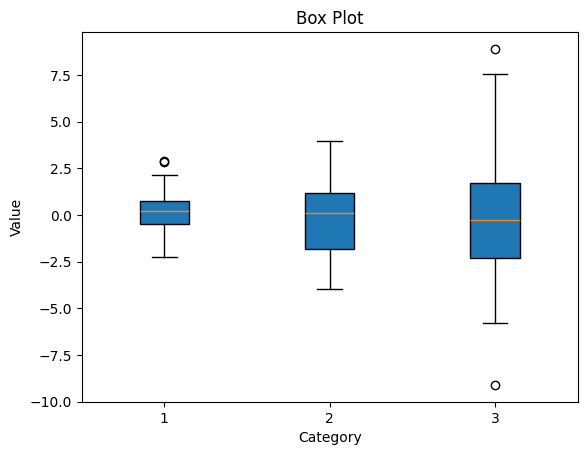

In [12]:
data = [np.random.normal(0, std, 100) for std in  range(1, 4)]

plt.boxplot(data, vert=True, patch_artist=True)
plt.title("Box Plot")
plt.xlabel("Category")
plt.ylabel("Value")
plt.show()


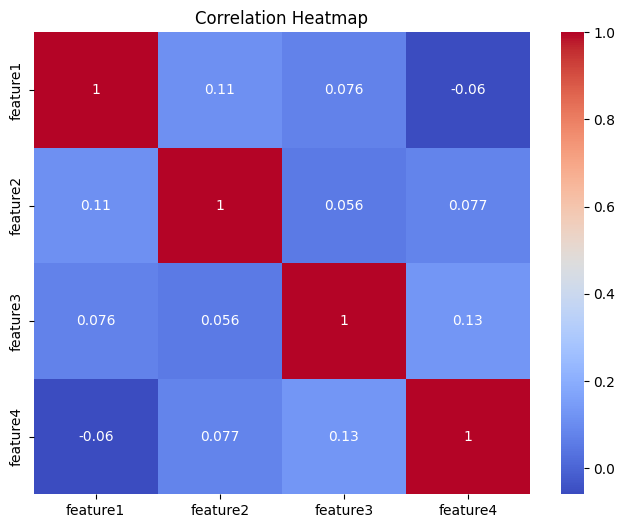

In [14]:
# 연관성
np.random.seed(0)
data = pd.DataFrame(
    {
        "feature1": np.random.randn(100),
        "feature2": np.random.randn(100) * 0.5,
        "feature3": np.random.randn(100) * 1.5,
        "feature4": np.random.randn(100) * 2,
    }
)

correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()